## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## Importing the CSV File

In [2]:
df=pd.read_csv("netflix_list.csv")

## Reading the records from the file

In [3]:
df.head(3)

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...


## Information of the file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       7008 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

## Null Values present in the columns

In [5]:
df.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language            0
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

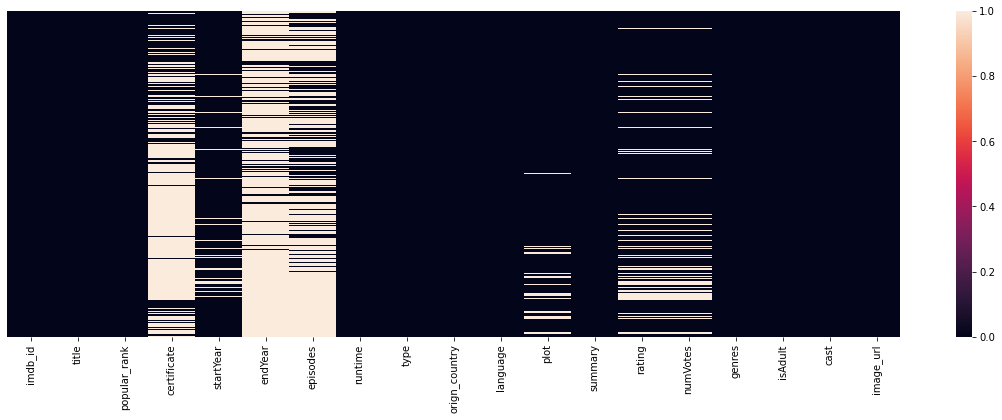

In [6]:
plt.figure(figsize=(20,6))
null=df.isnull()
sns.heatmap(null,yticklabels=False)
plt.show()

## Data Cleaning

### Handling Null values

#### Dropping the columns with null values more than 40% of total rows

In [7]:
df.drop(columns=["episodes","endYear","plot"],inplace=True)

#### Replacing Null Values with NaN values for columns that are necessary

In [8]:
df["certificate"].replace(np.nan,0,inplace=True)

#### Replacing null values with mean value of column itself

In [9]:
year=df["startYear"].mean()
year

2015.606653318959

In [10]:
meanyear=np.round_(year)
meanyear

2016.0

In [11]:
df["startYear"].fillna(meanyear,inplace=True)

In [12]:
df["startYear"].value_counts()

2016.0    1076
2020.0     917
2019.0     883
2018.0     834
2017.0     722
          ... 
1958.0       1
1986.0       1
1957.0       1
1981.0       1
1933.0       1
Name: startYear, Length: 77, dtype: int64

In [13]:
df["rating"].fillna(df["rating"].mean(),inplace=True)
df["numVotes"].fillna(df["numVotes"].mean(),inplace=True)

#### Deleting rows with Null Values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

imdb_id          0
title            0
popular_rank     0
certificate      0
startYear        0
runtime          0
type             0
orign_country    0
language         0
summary          0
rating           0
numVotes         0
genres           0
isAdult          0
cast             0
image_url        0
dtype: int64

In [16]:
df.nunique()

imdb_id          7006
title            7006
popular_rank     7006
certificate        25
startYear          77
runtime           260
type               10
orign_country      82
language           71
summary          6332
rating             78
numVotes         3745
genres            500
isAdult             1
cast             6280
image_url        6176
dtype: int64

In [17]:
df.rename(columns={"popular_rank":"Sr.No."},inplace=True)

In [18]:
df.set_index("Sr.No.",inplace=True)

In [19]:
df["isAdult"].value_counts()                #it contains 0 in all columns, so no adult content in dataset according to this column 

0    7006
Name: isAdult, dtype: int64

In [20]:
df.drop(columns="isAdult",inplace=True)

In [21]:
df.head(3)           # final dataset for data analysis

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
1,tt4052886,Lucifer,15,2016.0,42,tvSeries,United States,English,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
2,tt0993840,Army of the Dead,18,2021.0,148,movie,United States,English,"With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
3,tt7255502,The Kominsky Method,18,2018.0,30,tvSeries,United States,English,Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...


## Data Analysis & Visualisation

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7006 entries, 1 to 16,648
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7006 non-null   object 
 1   title          7006 non-null   object 
 2   certificate    7006 non-null   object 
 3   startYear      7006 non-null   float64
 4   runtime        7006 non-null   object 
 5   type           7006 non-null   object 
 6   orign_country  7006 non-null   object 
 7   language       7006 non-null   object 
 8   summary        7006 non-null   object 
 9   rating         7006 non-null   float64
 10  numVotes       7006 non-null   float64
 11  genres         7006 non-null   object 
 12  cast           7006 non-null   object 
 13  image_url      7006 non-null   object 
dtypes: float64(3), object(11)
memory usage: 821.0+ KB


In [23]:
df.nunique()

imdb_id          7006
title            7006
certificate        25
startYear          77
runtime           260
type               10
orign_country      82
language           71
summary          6332
rating             78
numVotes         3745
genres            500
cast             6280
image_url        6176
dtype: int64

### Type of Content posted till date

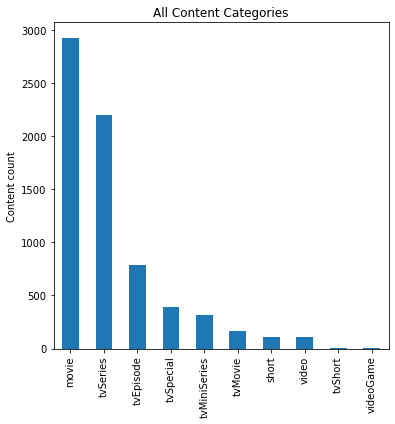

In [24]:
plt.figure(figsize=(6,6))
df["type"].value_counts().plot(kind="bar")
plt.title("All Content Categories")
plt.ylabel("Content count")
plt.show()

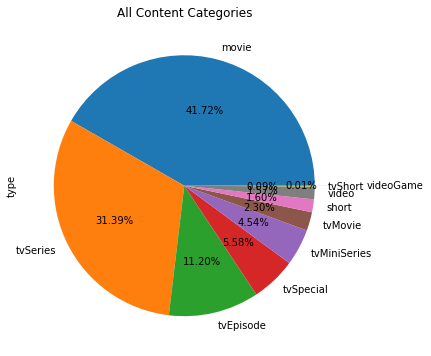

In [25]:
plt.figure(figsize=(6,6))
df["type"].value_counts().plot.pie(autopct="%1.2f%%",explode=[0,0,0,0,0,0,0,0,0,0.3])
plt.title("All Content Categories")
plt.show()

#### Insight :

- Considering all the records of dataset of content posted on netflix, Most of the content is **Movies**, least can go to a **Tv shorts** neglecting the one **Video Game** which is can not be usually a content of a video streaming service.

### Content of current year

In [26]:
yeargp=df.groupby("startYear")

In [27]:
con22=yeargp.get_group(2022)["type"].value_counts()

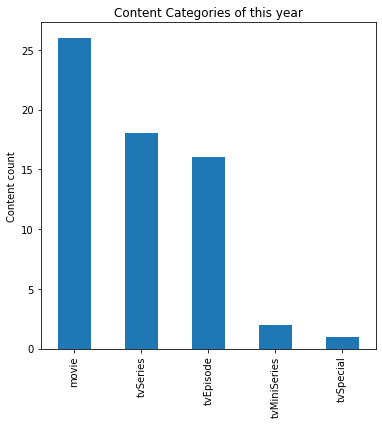

In [28]:
plt.figure(figsize=(6,6))
con22.plot(kind="bar")
plt.title("Content Categories of this year")
plt.ylabel("Content Type")
plt.ylabel("Content count")
plt.show()

### All contents according to startingYear

In [29]:
df["startYear"]=np.array(df["startYear"],dtype="int")      #changing the float datatype of startYear column to int

In [30]:
df["startYear"].value_counts().nlargest(13)

2016    1074
2020     917
2019     883
2018     834
2017     722
2021     546
2015     399
2014     318
2013     268
2012     185
2011     136
2010     117
2009      66
Name: startYear, dtype: int64

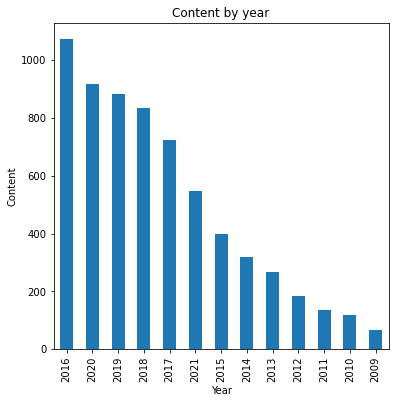

In [31]:
plt.figure(figsize=(6,6))
yearly=df["startYear"].value_counts().nlargest(13)
yearly.plot(kind="bar")
plt.title("Content by year")
plt.xlabel("Year")
plt.ylabel("Content")
plt.show()

In [32]:
df["type"].value_counts()

movie           2923
tvSeries        2199
tvEpisode        785
tvSpecial        391
tvMiniSeries     318
tvMovie          161
short            112
video            110
tvShort            6
videoGame          1
Name: type, dtype: int64

### Movies vs TV Series according to year 

In [33]:
mask1=df["type"]=="movie"
mask2=df["type"]=="tvSeries"

In [34]:
movdf=df[mask1]     
movdf.shape[0]      #total movies on netflix

2923

Text(0.5, 1.0, 'Movies per year')

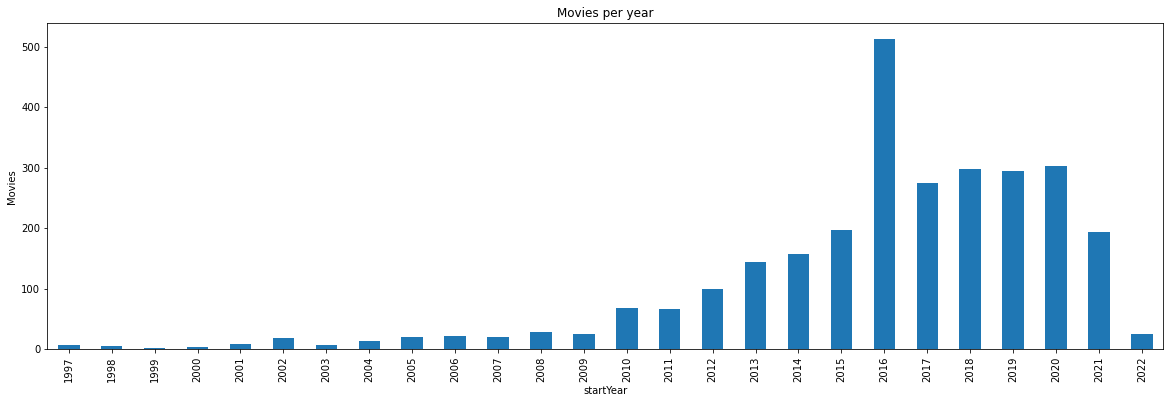

In [83]:
plt.figure(figsize=(20,6))
movdf.groupby("startYear")["type"].count().tail(26).plot(kind="bar")
plt.ylabel("Movies")
plt.title("Movies per year")

In [36]:
WS=df[mask2]
WS.shape[0]         #total tvSeries on netflix

2199

Text(0.5, 1.0, 'Movies per year')

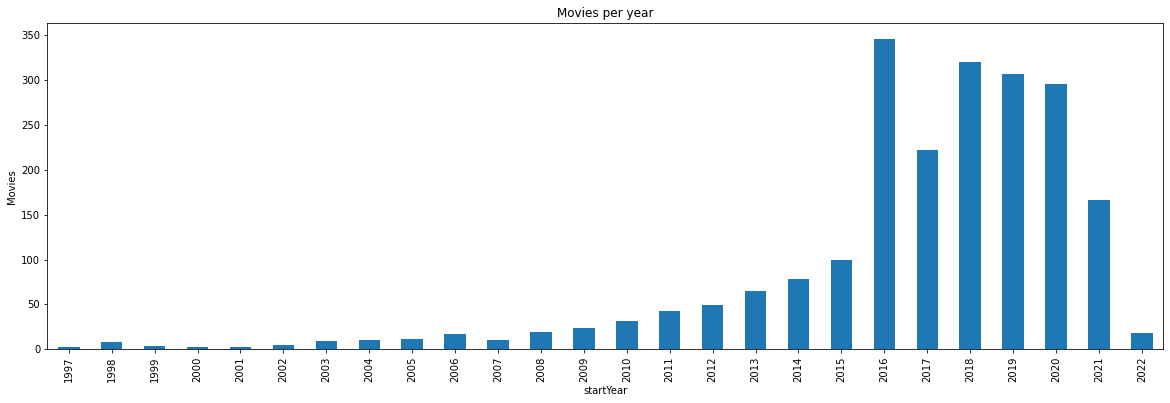

In [82]:
plt.figure(figsize=(20,6))
WS.groupby("startYear")["type"].count().tail(26).plot(kind="bar")
plt.ylabel("Movies")
plt.title("Movies per year")

In [38]:
mwdf=df[(mask1) | (mask2)]
mwdf.shape[0]

5122

In [80]:
year=[]
for i in np.arange(1997,2023):
    year.append(i)

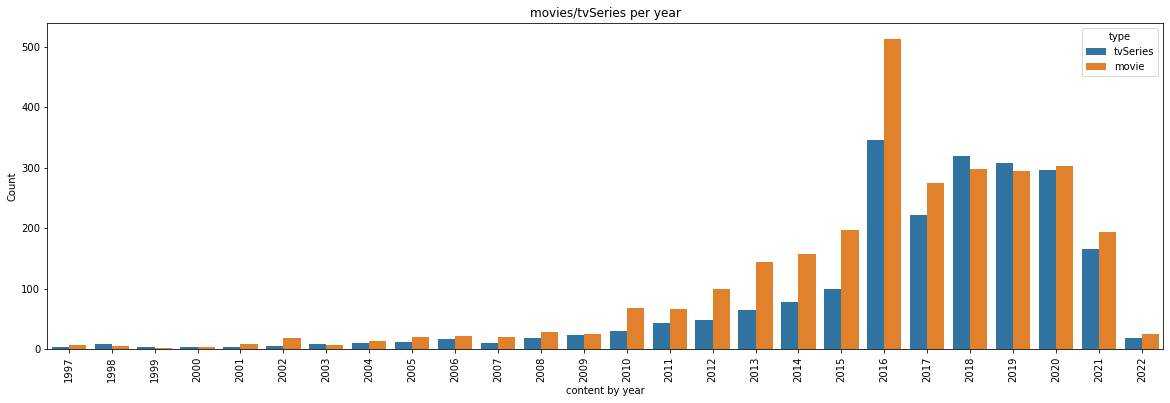

In [81]:
plt.figure(figsize=(20,6))
sns.countplot(data=mwdf, x="startYear",hue="type",order=year)
plt.title("movies/tvSeries per year")
plt.ylabel("Count")
plt.xlabel("content by year")
plt.xticks(rotation=90)
plt.show()

### Insights : 
    
- The netflix streaming services has been actively posting the content at the subscription based platform, **increasing year over year**.


- **Top content count** reached in the year **2016**, which only concludes people have started watching the online released content like Tv-series over daily soaps and new released movies at there homes conveniently instead of going to cinema halls to attend queues.


- If we see movies count has been always more than that of tv Series count but, Recently only in year **2018 & 2019**, count of tvSeries exceeded the count of movies.


- The **second top** content count is from the year **2020** which was the Covid-19 pandemic year.


- However effects can be seen on the next year **2021** where content count fell to less than **half** of the top content count. 

### Age certifications received by the contents

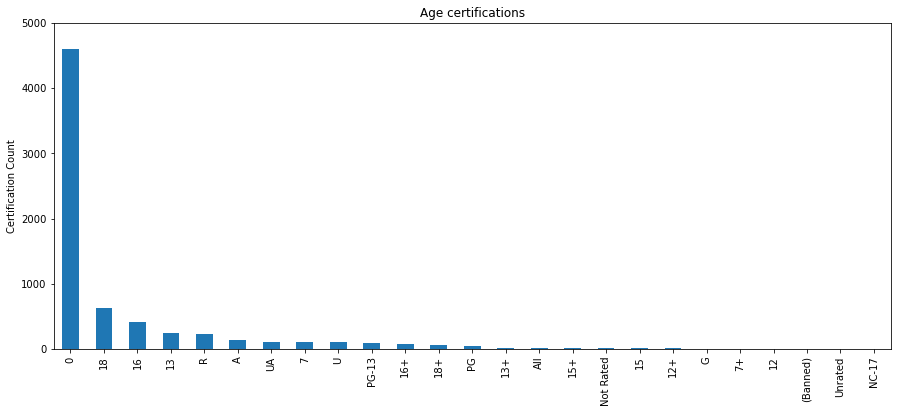

In [84]:
plt.figure(figsize=(15,6))
df["certificate"].value_counts().plot(kind="bar")
plt.title("Age certifications")
plt.ylabel("Certification Count")
plt.ylim(0,5000)
plt.show()

#### Dataset having content rated 18 & above

In [41]:
df[(df["certificate"]=="18") | (df["certificate"]=="18+")]         

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
2,tt0993840,Army of the Dead,18,2021,148,movie,United States,English,"With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
3,tt7255502,The Kominsky Method,18,2018,30,tvSeries,United States,English,Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
5,tt9251798,Ragnarok,18,2020,45,tvSeries,Norway,Norwegian,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...
6,tt5028002,StartUp,18,2016,44,tvSeries,United States,English,Miami - A desperate banker needs to conceal st...,8.0,16980.0,"Crime,Thriller","['Adam Brody', 'Edi Gathegi', 'Otmara Marrero'...",https://m.media-amazon.com/images/M/MV5BMTAxNT...
10,tt5774002,Jupiter's Legacy,18,2021,56,tvSeries,United States,English,The first generation of superheroes kept the w...,6.8,27309.0,"Action,Adventure,Drama","['Josh Duhamel', 'Ben Daniels', 'Leslie Bibb',...",https://m.media-amazon.com/images/M/MV5BMDU4MW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"16,428",tt9595408,Jugar con Fuego,18,2019,\N,tvEpisode,United States,Spanish,Fabrizio and Camila take risks while conductin...,7.6,31.0,Drama,"['Jason Day', 'Margarita Rosa de Francisco', '...",https://m.media-amazon.com/images/M/MV5BZTI4M2...
"16,471",tt9694574,Quicksand,18,2019,45,tvEpisode,Sweden,Swedish,"In the aftermath of a school shooting, 18-year...",7.3,546.0,"Crime,Drama","['Hanna Ardéhn', 'Felix Sandman', 'David Denci...",https://m.media-amazon.com/images/M/MV5BNmFhNm...
"16,487",tt9702620,The Valhalla Murders,18,2019,\N,tvEpisode,Iceland,Icelandic,Following a brutal murder at Reykjavik's harbo...,7.0,461.0,"Crime,Drama,Mystery","['Bergur Ebbi Benediktsson', 'Edda Björgvinsdó...",https://m.media-amazon.com/images/M/MV5BMGRjOD...


#### Insight :

- Netflix has atleast **10%** content rated **18 & 18+**, where other 30% is **7-16+**, the  rest 60% of the content is not rated.

### Content According to Language

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7006 entries, 1 to 16,648
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7006 non-null   object 
 1   title          7006 non-null   object 
 2   certificate    7006 non-null   object 
 3   startYear      7006 non-null   int32  
 4   runtime        7006 non-null   object 
 5   type           7006 non-null   object 
 6   orign_country  7006 non-null   object 
 7   language       7006 non-null   object 
 8   summary        7006 non-null   object 
 9   rating         7006 non-null   float64
 10  numVotes       7006 non-null   float64
 11  genres         7006 non-null   object 
 12  cast           7006 non-null   object 
 13  image_url      7006 non-null   object 
dtypes: float64(2), int32(1), object(11)
memory usage: 793.6+ KB


In [43]:
len(df["language"].value_counts())

71

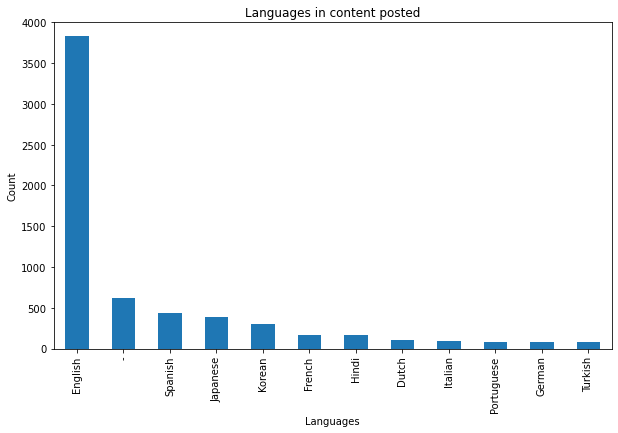

In [44]:
plt.figure(figsize=(10,6))
dfl=df["language"].value_counts()
dfl.head(12).plot(kind="bar")                         #languages which contribute as 1% atleast of total dataset
plt.title("Languages in content posted")
plt.xlabel("Languages")
plt.ylabel("Count")
plt.ylim(0,4000)
plt.show()

#### Insight:
    
- This data shows the languages which contribute as 1% atleast of total dataset. Where more than **50%** of content is in **"English"** language. There are a total **70 language** types with 1 **annonymous** type of language.

### Runtime of Movies

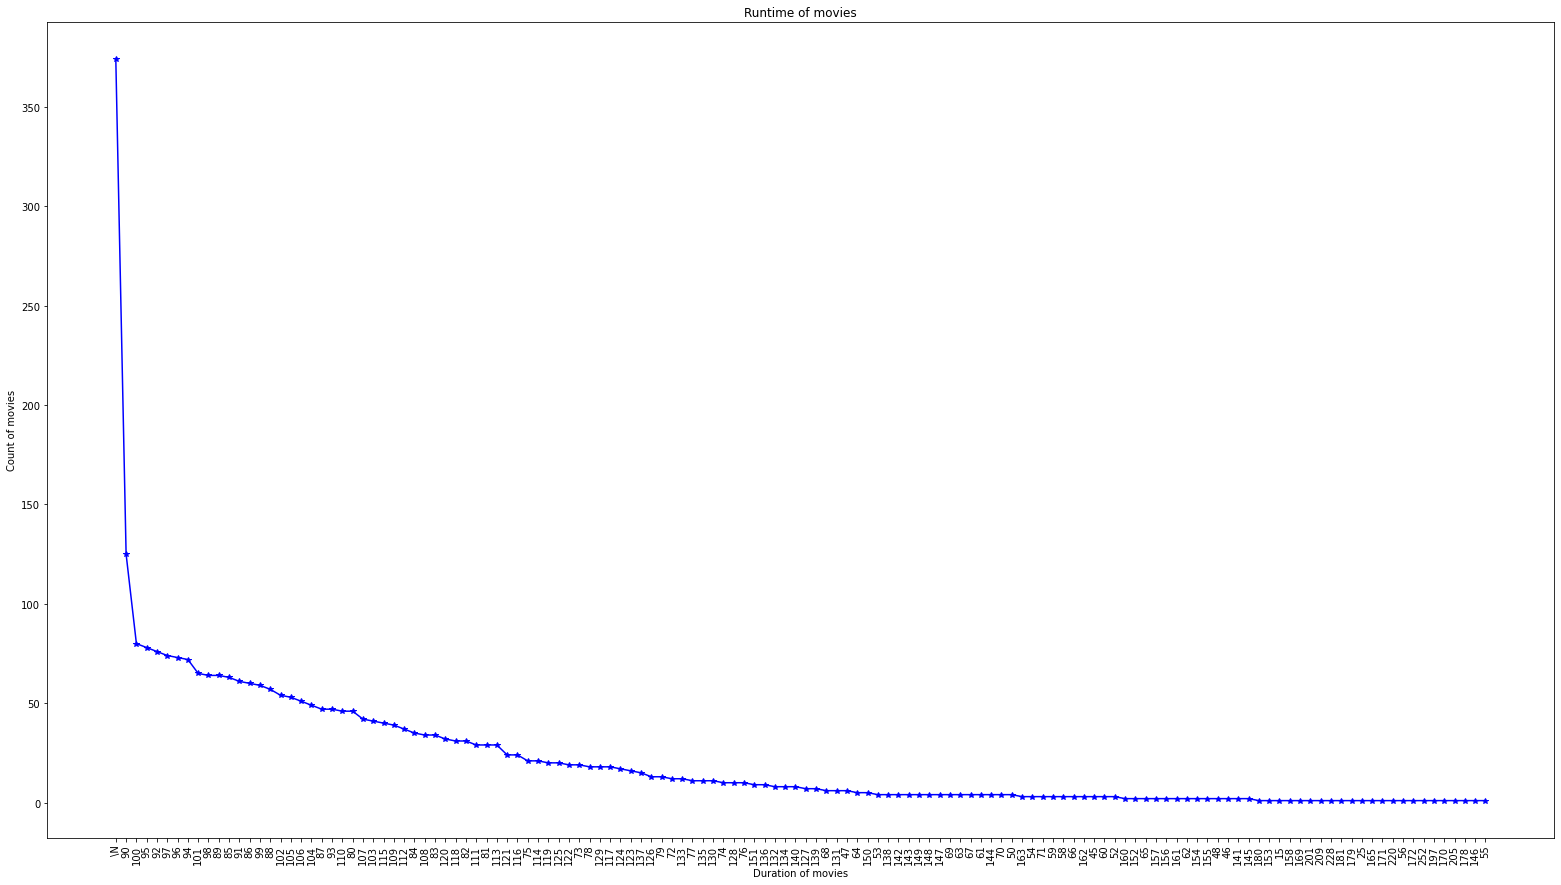

In [45]:
plt.figure(figsize=(27,15))
runtime=df["runtime"].loc[df["type"]=="movie"].value_counts().sort_values(ascending=False)
plt.plot(runtime,"b-*")
plt.xticks(rotation=90)
plt.title("Runtime of movies")
plt.ylabel("Count of movies")
plt.xlabel("Duration of movies")
plt.show()

In [46]:
mean=runtime.mean()
median=runtime.median()
mean

21.813432835820894

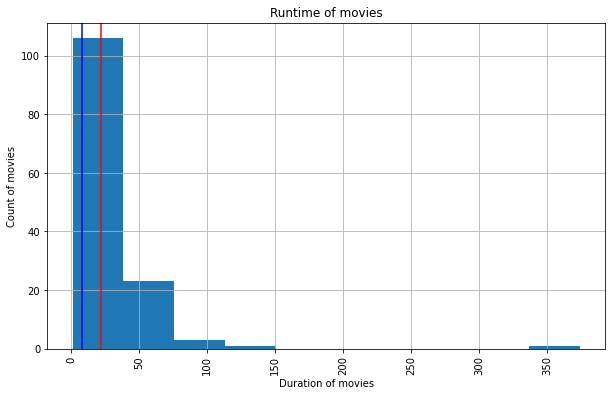

In [47]:
plt.figure(figsize=(10,6))
runtime=df["runtime"].loc[df["type"]=="movie"].value_counts()
runtime.hist()
plt.xticks(rotation=90)
plt.title("Runtime of movies")
plt.ylabel("Count of movies")
plt.xlabel("Duration of movies")
plt.axvline(mean,c="r")
plt.axvline(median,c="b")
plt.show()

#### Insight :

- So the amoung all movies, movies of duration **1 hr 30 min - 2 hrs** are more in numbers.
- With shortest movie being of length **15 mins**, perhaps we should call it a **short film**.
- With longest movie being of length **4 hrs 12 mins**.
- Average length of movies being of arount **22 mins**.
- The data shows **right skewness** in probability distribution.

## Country wise Content

In [48]:
df.head(3)

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
1,tt4052886,Lucifer,15,2016,42,tvSeries,United States,English,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
2,tt0993840,Army of the Dead,18,2021,148,movie,United States,English,"With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
3,tt7255502,The Kominsky Method,18,2018,30,tvSeries,United States,English,Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...


#### Countries that posted content on netflix atlease 1% of total content.

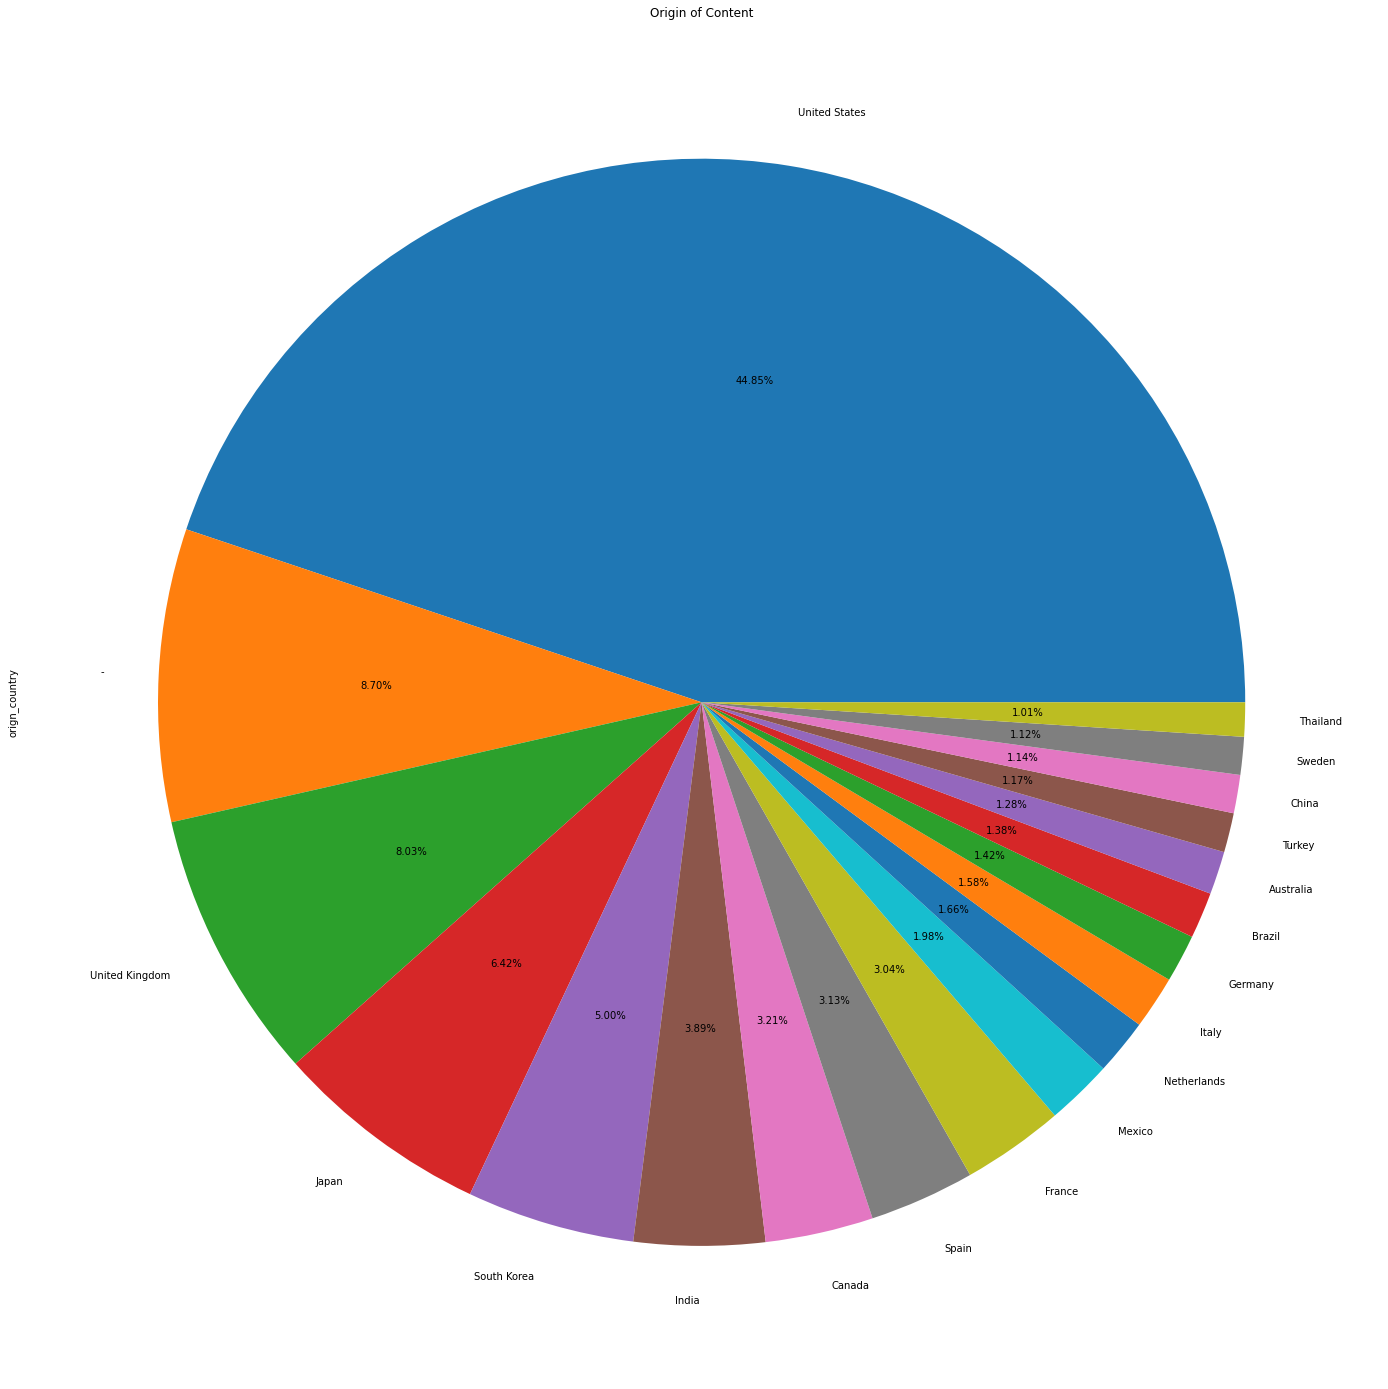

In [49]:
plt.figure(figsize=(25,25))
df["orign_country"].value_counts().nlargest(19).plot.pie(autopct="%1.2f%%")
plt.title("Origin of Content")
plt.show()

#### Insight :
    
- **USA** has been the most prominent participant in posting the content on netflix, posting almost **half of the entire content**.
- **Top 5** origin countries for the content are **USA, UK, Japan, South Korea, India**. We must have watched content of all this origin countries at least once.

## Movie ratings & Genres

In [50]:
df[["rating","genres"]].nlargest(30,columns="rating")

,rating,genres
Sr.No.,,
"12,576",9.7,"Adventure,Animation,Comedy"
15,9.4,"Crime,Drama,Thriller"
"3,673",9.4,Talk-Show
138,9.3,"Action,Adventure,Animation"
595,9.3,"Action,Drama,Fantasy"
767,9.3,Documentary
"1,152",9.3,Documentary
"10,508",9.3,"Crime,Drama,Thriller"
60,9.2,"Adventure,Animation,Comedy"


In [51]:
ratingdf=df[df["rating"]>9].sort_values(by="rating",ascending=False)
ratingdf

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"12,576",tt5851610,Ask the StoryBots,0,2016,\N,tvEpisode,-,English,The StoryBots journey from the top of a mounta...,9.7,22.0,"Adventure,Animation,Comedy","['Judy Greer', 'Erin Fitzgerald', 'Fred Tatasc...",https://m.media-amazon.com/images/M/MV5BZjRiMG...
15,tt0903747,Breaking Bad,18,2008,49,tvSeries,United States,English,When chemistry teacher Walter White is diagnos...,9.4,1523446.0,"Crime,Drama,Thriller","['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', ...",https://m.media-amazon.com/images/M/MV5BMjhiMz...
"3,673",tt11225622,Stranger Things: Spotlight,0,2018,\N,tvSeries,United States,English,-,9.4,73.0,Talk-Show,-,https://m.media-amazon.com/images/M/MV5BMDRjYW...
138,tt0417299,Avatar: The Last Airbender,U,2005,23,tvSeries,United States,English,The world is divided into four elemental natio...,9.3,260290.0,"Action,Adventure,Animation","['Dee Bradley Baker', 'Zach Tyler', 'Mae Whitm...",https://m.media-amazon.com/images/M/MV5BODc5YT...
595,tt12458172,Word of Honor,0,2021,45,tvSeries,China,Chinese,Zhou Zi Shu gets embroiled in a conspiracy in ...,9.3,1864.0,"Action,Drama,Fantasy","['Jun Gong', 'Zhehan Zhang', 'Ye Zhou', 'Wenyu...",https://m.media-amazon.com/images/M/MV5BMTVjOW...
767,tt2395695,Cosmos: A Spacetime Odyssey,0,2014,557,tvMiniSeries,United States,English,Join the heroic quest for knowledge as we set ...,9.3,113393.0,Documentary,"['Neil deGrasse Tyson', 'Stoney Emshwiller', '...",https://m.media-amazon.com/images/M/MV5BZTk5OT...
"1,152",tt9253866,Our Planet,0,2019,403,tvMiniSeries,United States,English,Documentary series focusing on the breadth of ...,9.3,35560.0,Documentary,['David Attenborough'],https://m.media-amazon.com/images/M/MV5BN2I1Zj...
"10,508",tt3097534,Fargo,16+,2014,69,tvEpisode,United States,English,"A ruthless, manipulative man meets a small-tow...",9.3,12655.0,"Crime,Drama,Thriller","['Billy Bob Thornton', 'Allison Tolman', 'Coli...",https://m.media-amazon.com/images/M/MV5BMjA3Mz...
"15,129",tt8408104,Heartland,16,2019,44,tvEpisode,Canada,Greek,Amy and Ty care for a wild mare and her foal. ...,9.2,127.0,"Drama,Family","['Amber Marshall', 'Michelle Morgan', 'Graham ...",https://m.media-amazon.com/images/M/MV5BZjhhNm...


In [52]:
ratingdf.shape[0]               #no. of content recieved ratings over 9

28

In [53]:
yeargp.get_group(2020)["rating"].mean()

6.6261478735005355

In [54]:
ratedf=pd.DataFrame([],columns=["Year","Avg. Rating"])
for i in range(1997,2023):
    ratyear=yeargp.get_group(i)["rating"].mean()          #netflix started in 1997 i.e. it is their silver jubilee anniversary
    ratedf=ratedf.append({"Year":i,"Avg. Rating":ratyear},ignore_index=True)
ratedf

,Year,Avg. Rating
0,1997.0,7.420000
1,1998.0,6.925000
2,1999.0,7.500000
3,2000.0,7.474100
4,2001.0,7.313309
5,2002.0,6.756365
6,2003.0,7.246800
7,2004.0,6.635457
8,2005.0,6.470958
9,2006.0,7.062763


In [55]:
df.groupby("startYear")["rating"].mean()

startYear
1932    6.550000
1933    5.400000
1938    5.200000
1941    7.200000
1944    5.900000
          ...   
2018    6.671732
2019    6.750420
2020    6.626148
2021    6.739115
2022    6.696400
Name: rating, Length: 77, dtype: float64

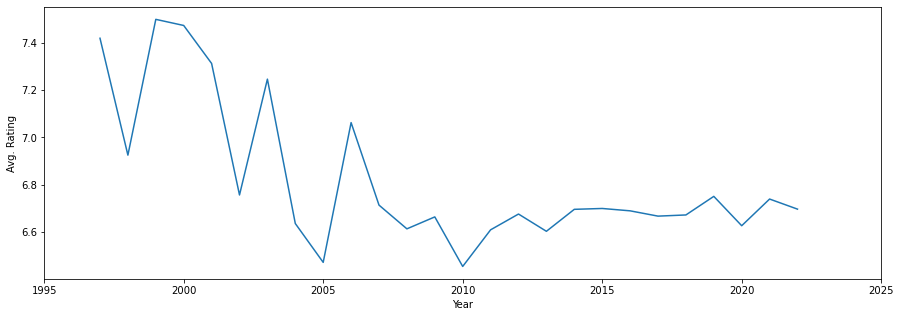

In [56]:
plt.figure(figsize=(15,5))
sns.lineplot(data=ratedf,x="Year",y="Avg. Rating")
plt.xlim(1995,2025)
plt.show()

#### Insight :

- Avg. Rating of content has **dropped** after around 10 years of netflix services launched, and managing at same level ever since.

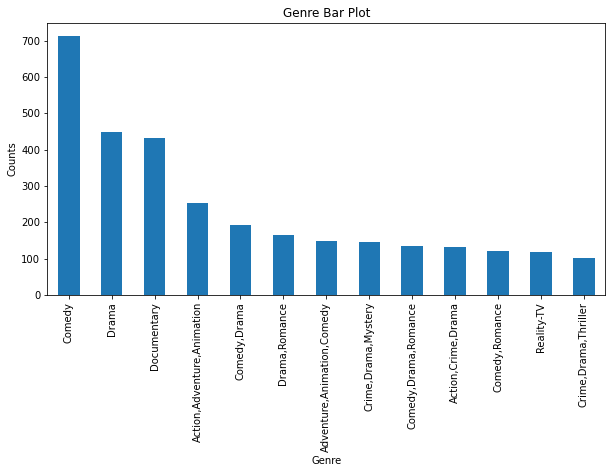

In [57]:
plt.figure(figsize=(10,5))
df["genres"].value_counts().nlargest(13).plot.bar()
plt.title("Genre Bar Plot")
plt.xlabel("Genre")
plt.ylabel("Counts")
plt.show()

Insight :
    
- Top 5 Categories of genre are : **Comedy, Drama, Documentry, Action, Adventure**.

## Sorting & Filtering

### Top 5 Comedy Contents

In [58]:
df[(df["genres"]=="Comedy")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"8,178",tt12180304,Middleditch & Schwartz,18,2020,52,tvEpisode,United States,English,"An audience tale of love, music festivals and ...",9.1,493.0,Comedy,"['Thomas Middleditch', 'Ben Schwartz']",https://m.media-amazon.com/images/M/MV5BM2ZhOW...
"5,910",tt6791836,The Umbilical Brothers: The Rehearsal,0,2014,92,video,Australia,English,The outrageous comedy duo uses elements of mul...,8.9,16.0,Comedy,"['David Collins', 'Shane Dundas', 'Paul Michae...",https://m.media-amazon.com/images/M/MV5BYmVmNT...
82,tt0098904,Seinfeld,13,1989,22,tvSeries,United States,English,Jerry Seinfeld stars in this television comedy...,8.8,261467.0,Comedy,"['Jerry Seinfeld', 'Julia Louis-Dreyfus', 'Mic...",https://m.media-amazon.com/images/M/MV5BZjZjMz...
792,tt0281491,Still Game,0,2002,30,tvSeries,United Kingdom,English,Jack and Victor have broken out of Chewin' The...,8.8,6441.0,Comedy,"['Ford Kiernan', 'Greg Hemphill', 'Paul Riley'...",https://m.media-amazon.com/images/M/MV5BMTIwNT...
"1,238",tt0063929,Monty Python's Flying Circus,0,1969,30,tvSeries,United Kingdom,English,The irreverent Monty Python comedy troupe pres...,8.8,68701.0,Comedy,"['Graham Chapman', 'John Cleese', 'Terry Gilli...",https://m.media-amazon.com/images/M/MV5BMWY2ZG...


### Insight :

- Ironically, The cartoon Tv-Series after which the **creator of python "Guido van russom"** named the multi-purpose widely used programming language **"Python"** is the **5th top rated Comedy** content available on netflix

### Top 5 Drama Series 

In [59]:
df[(df["genres"]=="Drama")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"8,338",tt12478536,Move to Heaven,18,2021,\N,tvEpisode,South Korea,Korean,A factory intern's fatal injury brings Han Jeo...,9.0,64.0,Drama,"['Lee Jehoon', 'Tang Joon-sang', 'Jin-hee Ji',...",https://m.media-amazon.com/images/M/MV5BZjM2Zj...
"6,584",tt10150948,Pose,18,2019,42,tvEpisode,United States,English,"With Blanca reeling from an unexpected loss, E...",8.9,563.0,Drama,"['Mj Rodriguez', 'Dominique Jackson', 'Indya M...",https://m.media-amazon.com/images/M/MV5BN2Q4OT...
323,tt11052470,Move to Heaven,18,2021,60,tvSeries,South Korea,Korean,"Working as trauma cleaners, both Gu-ru and San...",8.8,1547.0,Drama,"['Lee Jehoon', 'Tang Joon-sang', 'Hong Seung-h...",https://m.media-amazon.com/images/M/MV5BYjNhMD...
"1,136",tt13885302,Nabillera,13,2021,60,tvSeries,South Korea,Korean,A 70-year-old with a dream and a 23-year-old w...,8.8,835.0,Drama,"['In-hwan Park', 'Song Kang', 'Moon-hee Na', '...",https://m.media-amazon.com/images/M/MV5BNmU1OT...
148,tt1856010,House of Cards,16+,2013,51,tvSeries,United States,English,Majority House Whip Francis Underwood takes yo...,8.7,473402.0,Drama,"['Kevin Spacey', 'Michel Gill', 'Robin Wright'...",https://m.media-amazon.com/images/M/MV5BODM1MD...


### Top 5 Action & Adventure Series 

In [60]:
df[(df["genres"]=="Action,Adventure,Animation")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
138,tt0417299,Avatar: The Last Airbender,U,2005,23,tvSeries,United States,English,The world is divided into four elemental natio...,9.3,260290.0,"Action,Adventure,Animation","['Dee Bradley Baker', 'Zach Tyler', 'Mae Whitm...",https://m.media-amazon.com/images/M/MV5BODc5YT...
225,tt1355642,Hagane no renkinjutsushi,18+,2009,24,tvSeries,Japan,Japanese,Two brothers lose their mother to an incurable...,9.1,130674.0,"Action,Adventure,Animation","['Kent Williams', 'Iemasa Kayumi', 'Vic Mignog...",https://m.media-amazon.com/images/M/MV5BZmEzN2...
34,tt2560140,Shingeki no kyojin,13,2013,24,tvSeries,Japan,Japanese,Humans are nearly exterminated by giant creatu...,9.0,233131.0,"Action,Adventure,Animation","['Yûki Kaji', 'Marina Inoue', 'Josh Grelle', '...",https://m.media-amazon.com/images/M/MV5BMTY5OD...
158,tt12343534,Jujutsu Kaisen,16,2020,24,tvSeries,Japan,Japanese,"Yuji Itadori, a kind-hearted teenager, joins h...",8.8,19789.0,"Action,Adventure,Animation","['Junya Enoki', 'Yûichi Nakamura', 'Yuma Uchid...",https://m.media-amazon.com/images/M/MV5BNzQyYz...
"6,330",tt0825773,Bleach: Burîchi,16,2005,23,tvEpisode,Japan,Japanese,Captain Kurotsushi decides that rather than ki...,8.7,171.0,"Action,Adventure,Animation","['Noriaki Sugiyama', 'Ryûsei Nakao', 'Toshiyuk...",https://m.media-amazon.com/images/M/MV5BMTUzOD...


### Rated above 9  Tv Series

In [61]:
df[(df["rating"]>9)].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"12,576",tt5851610,Ask the StoryBots,0,2016,\N,tvEpisode,-,English,The StoryBots journey from the top of a mounta...,9.7,22.0,"Adventure,Animation,Comedy","['Judy Greer', 'Erin Fitzgerald', 'Fred Tatasc...",https://m.media-amazon.com/images/M/MV5BZjRiMG...
15,tt0903747,Breaking Bad,18,2008,49,tvSeries,United States,English,When chemistry teacher Walter White is diagnos...,9.4,1523446.0,"Crime,Drama,Thriller","['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', ...",https://m.media-amazon.com/images/M/MV5BMjhiMz...
"3,673",tt11225622,Stranger Things: Spotlight,0,2018,\N,tvSeries,United States,English,-,9.4,73.0,Talk-Show,-,https://m.media-amazon.com/images/M/MV5BMDRjYW...
138,tt0417299,Avatar: The Last Airbender,U,2005,23,tvSeries,United States,English,The world is divided into four elemental natio...,9.3,260290.0,"Action,Adventure,Animation","['Dee Bradley Baker', 'Zach Tyler', 'Mae Whitm...",https://m.media-amazon.com/images/M/MV5BODc5YT...
595,tt12458172,Word of Honor,0,2021,45,tvSeries,China,Chinese,Zhou Zi Shu gets embroiled in a conspiracy in ...,9.3,1864.0,"Action,Drama,Fantasy","['Jun Gong', 'Zhehan Zhang', 'Ye Zhou', 'Wenyu...",https://m.media-amazon.com/images/M/MV5BMTVjOW...


In [62]:
df["type"].value_counts()

movie           2923
tvSeries        2199
tvEpisode        785
tvSpecial        391
tvMiniSeries     318
tvMovie          161
short            112
video            110
tvShort            6
videoGame          1
Name: type, dtype: int64

### Top 5 Movies

In [63]:
df[(df["type"]=="movie")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"3,665",tt2592910,CM101MMXI Fundamentals,0,2013,139,movie,Turkey,Turkish,The funny little details of everyday life; the...,9.2,44301.0,"Comedy,Documentary",['Cem Yilmaz'],https://m.media-amazon.com/images/M/MV5BMjE0Nj...
"1,455",tt11989890,David Attenborough: A Life on Our Planet,13,2020,83,movie,United Kingdom,English,One man has seen more of the natural world tha...,9.0,27666.0,"Biography,Documentary","['David Attenborough', 'Max Hughes']",https://m.media-amazon.com/images/M/MV5BY2FkMj...
192,tt0167260,The Lord of the Rings: The Return of the King,U,2003,201,movie,New Zealand,English,The final confrontation between the forces of ...,8.9,1677017.0,"Action,Adventure,Drama","['Elijah Wood', 'Viggo Mortensen', 'Ian McKell...",https://m.media-amazon.com/images/M/MV5BNzA5ZD...
"1,986",tt14369930,In Our Mothers' Gardens,0,2021,\N,movie,United States,English,In Our Mothers' Gardens celebrates the strengt...,8.9,51.0,Documentary,"['Tarana Burke', 'Tina Farris', 'Shantrelle P....",https://m.media-amazon.com/images/M/MV5BZjk5ND...
114,tt0120737,The Lord of the Rings: The Fellowship of the Ring,U,2001,178,movie,New Zealand,English,An ancient Ring thought lost for centuries has...,8.8,1697849.0,"Action,Adventure,Drama","['Elijah Wood', 'Ian McKellen', 'Orlando Bloom...",https://m.media-amazon.com/images/M/MV5BN2EyZj...


### Top 5 Tv Series

In [64]:
df[(df["type"]=="tvSeries")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
15,tt0903747,Breaking Bad,18,2008,49,tvSeries,United States,English,When chemistry teacher Walter White is diagnos...,9.4,1523446.0,"Crime,Drama,Thriller","['Bryan Cranston', 'Aaron Paul', 'Anna Gunn', ...",https://m.media-amazon.com/images/M/MV5BMjhiMz...
"3,673",tt11225622,Stranger Things: Spotlight,0,2018,\N,tvSeries,United States,English,-,9.4,73.0,Talk-Show,-,https://m.media-amazon.com/images/M/MV5BMDRjYW...
138,tt0417299,Avatar: The Last Airbender,U,2005,23,tvSeries,United States,English,The world is divided into four elemental natio...,9.3,260290.0,"Action,Adventure,Animation","['Dee Bradley Baker', 'Zach Tyler', 'Mae Whitm...",https://m.media-amazon.com/images/M/MV5BODc5YT...
595,tt12458172,Word of Honor,0,2021,45,tvSeries,China,Chinese,Zhou Zi Shu gets embroiled in a conspiracy in ...,9.3,1864.0,"Action,Drama,Fantasy","['Jun Gong', 'Zhehan Zhang', 'Ye Zhou', 'Wenyu...",https://m.media-amazon.com/images/M/MV5BMTVjOW...
60,tt2861424,Rick and Morty,16+,2013,23,tvSeries,United States,English,An animated series on adult-swim about the inf...,9.2,394286.0,"Adventure,Animation,Comedy","['Justin Roiland', 'Chris Parnell', 'Spencer G...",https://m.media-amazon.com/images/M/MV5BZjRjOT...


### Top 5 Comedy Tv-Series

In [65]:
df[(df["type"]=="tvSeries") & (df["genres"]=="Comedy,Romance")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
4,tt0108778,Friends,13+,1994,22,tvSeries,United States,English,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
"1,263",tt14596414,Yi Guyeokui Michin X,0,2021,30,tvSeries,South Korea,Korean,Bothered to realize they are next-door neighbo...,8.5,69.0,"Comedy,Romance","['Woo Jung', 'Yeon-Seo Oh', 'Lee Hye-Ra', 'Su-...",https://m.media-amazon.com/images/M/MV5BOWYwMD...
"1,674",tt6157148,Yeokdoyojeong Gim Bokju,13,2016,60,tvSeries,South Korea,Korean,"A unforgettable story about youth, friendship ...",8.4,5620.0,"Comedy,Romance","['Lee Song-Kyoung', 'Nam Joo-Hyuk', 'Jae-yoon ...",https://m.media-amazon.com/images/M/MV5BOTMwNT...
49,tt0460649,How I Met Your Mother,15+,2005,22,tvSeries,United States,English,"Ted Mosby sits down with his kids, to tell the...",8.3,617378.0,"Comedy,Romance","['Josh Radnor', 'Jason Segel', 'Cobie Smulders...",https://m.media-amazon.com/images/M/MV5BNjg1MD...
"1,631",tt6522580,Little Things,U,2016,16,tvSeries,India,English,A cohabiting couple in their 20s navigate the ...,8.3,4783.0,"Comedy,Romance","['Dhruv Sehgal', 'Mithila Palkar', 'Abhishek B...",https://m.media-amazon.com/images/M/MV5BZWI4Nj...


### Top 5 Comedy & Romantic Movies

In [66]:
df[(df["type"]=="movie") & (df["genres"]=="Comedy,Romance")].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"5,322",tt0214275,Venus on the Halfshell,0,2003,\N,movie,United States,English,"Smart, young forest ranger marries handsome, f...",7.5,37.0,"Comedy,Romance","['Monica Snow', 'Jonathan Aube', 'Jennifer Gar...",https://m.media-amazon.com/images/M/MV5BMjE4Nz...
"2,714",tt7853242,Love Per Square Foot,UA,2018,133,movie,India,Hindi,"Love Per Sq Ft, is a feature film which deals ...",7.2,7577.0,"Comedy,Romance","['Vicky Kaushal', 'Angira Dhar', 'Alankrita Sa...",https://m.media-amazon.com/images/M/MV5BMzM4NG...
442,tt0129387,There's Something About Mary,A,1998,119,movie,United States,English,"Ted was a geek in high school, who was going t...",7.1,295181.0,"Comedy,Romance","['Cameron Diaz', 'Matt Dillon', 'Ben Stiller',...",https://m.media-amazon.com/images/M/MV5BZWFlZj...
524,tt0478311,Knocked Up,18,2007,129,movie,United States,English,When Alison Scott is promoted in E! Television...,6.9,354889.0,"Comedy,Romance","['Seth Rogen', 'Katherine Heigl', 'Paul Rudd',...",https://m.media-amazon.com/images/M/MV5BNzgzYj...
240,tt0112697,Clueless,U,1995,97,movie,United States,English,"Cher, a high school student in Beverly Hills, ...",6.8,190275.0,"Comedy,Romance","['Alicia Silverstone', 'Stacey Dash', 'Brittan...",https://m.media-amazon.com/images/M/MV5BMzBmOG...


In [67]:
df[df["orign_country"]=="India"].nlargest(5,columns="rating")

,imdb_id,title,certificate,startYear,runtime,type,orign_country,language,summary,rating,numVotes,genres,cast,image_url
Sr.No.,,,,,,,,,,,,,,
"1,418",tt8595766,Yeh Meri Family,7+,2018,30,tvSeries,India,Hindi,"Harshu(12), a rebel Indian adolescent is comin...",9.1,21366.0,"Comedy,Drama,Family","['Vishesh Bansal', 'Mona Singh', 'Akarsh Khura...",https://m.media-amazon.com/images/M/MV5BZWMxMj...
"1,719",tt8809646,College Romance,16+,2018,30,tvSeries,India,Hindi,"Three best friends look for love, laughs and s...",8.9,23556.0,"Comedy,Drama,Romance","['Manjot Singh', 'Apoorva Arora', 'Keshav Sadh...",https://m.media-amazon.com/images/M/MV5BMzM3NG...
"4,428",tt9642576,Regiment Diaries,13,2018,\N,tvSeries,India,Hindi,The Indian army is a family of several regimen...,8.8,61.0,Documentary,-,https://m.media-amazon.com/images/M/MV5BZDlmYT...
"14,736",tt8058636,Sacred Games,A,2018,51,tvEpisode,India,Hindi,A mysterious phone call from an anonymous man ...,8.8,2702.0,"Action,Crime,Drama","['Nawazuddin Siddiqui', 'Saif Ali Khan', 'Elna...",https://m.media-amazon.com/images/M/MV5BZWE5Mm...
547,tt6077448,Sacred Games,A,2018,50,tvSeries,India,Hindi,"Sartaj Singh, a Mumbai police officer, receive...",8.6,78917.0,"Action,Crime,Drama","['Saif Ali Khan', 'Nawazuddin Siddiqui', 'Neer...",https://m.media-amazon.com/images/M/MV5BMjJlMj...


## Conclusion :

- This dataset contains numerous **types** of contents including **Movies, Tv Series, Mini Series, Tv Episodes, Short Movies, Shorts (Short videos)** from which **Movies & TV Series** covers most of the content posted by **USA, UK, Japan, N. Korea, India** thusly **English, Japanese, Korean** language most.
- This dataset has almost **10% content rated 18 & 18+**, where other **30%** is **7-16+**.
- Most of the content is posted in recent 10 years but has average rating of 6.6-6.8 overall, this may be due to increase of content count.
- As the content count is only in range of 100 - 200 or below than that for **years before 2012**, **rating** mean is bit **high**. It is due to top content from the old times is only posted on the netflix.
- **2016** was **enriched** of **netflix content**, and also despite **Covid** pandemic situation **2020** was **2nd top** content posted year.
- As people tend to turn to these kind of plateforms for entertainment top two genre categories are **Comedy & Drama**, with average runtime of **1 hr 30 to 2 hrs**.

## Now some suggestions for what to stream on netflix according to this data analysis 

### - If you're looking for content according to top genres of netflix:
   
   
   - for **Comedy** :
        - 1) "Middleditch & Schwartz" : An audience tale of love, music festivals
        - 2) "Seinfeld" 
        - 3) "Monty Python's Flying Circus" : The cartoon series that Python language is named after by it's owner
   
   
   - for **Drama** :
        - 1) "Move to Heaven" 
        - 2) "Nabillera"
        - 3) "House of Cards"
   
   
   - for **Action & Adventure**:
        - 1) "Avatar: The Last Airbender"	
        - 2) "Jujutsu Kaisen" : Anime
   
   
   - for **Top rated TV-Series**:
        - 1) "Ask the StoryBots"
        - 2) "Breaking Bad"
        - 3) "Stranger Things: Spotlight"
        - 4) "Word of Honor"
  
  
  - for **Top Movies**:
       - 1) "David Attenborough: A Life on Our Planet" - *Documentary*
       - 2) "The Lord of the Rings: The Return of the King"    
            - (Tip : If you love this movie, it's other parts are also in top rated list)
       - 3) "In Our Mothers' Gardens"
    
    
   - for **Top TV Series**:
        - 1) "Breaking Bad"
        - 2) "Avatar: The Last Airbender"
        - 3) "Rick and Morty"
        

   - for **Top Comedy Series**:
        - 1) "Friends" : Personal Favourite
        - 2) "Yeokdoyojeong Gim Bokju"
        - 3) "How I Met Your Mother"
        - 4) "Little Things"
        
        
   - for **Comedy & Romantic**:
        - 1) 'Venus on the Halfshell'
        - 2) "Love per Square Foot"
        - 3) "There's Something About Mary"
        
        
   - **Top Indian Content**
       - 1) Yeh Meri Family
       - 2) College Romance
       - 3) Sacred Games
       
       
- Well this list can go endless based on the genre of one's precedence & their mixes. Don't bother to surf through netflix by yourself, you may find something exciting that is not listed here.

# Thank You!!!